In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# splitting data and model evaluation
from sklearn.metrics import recall_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# sampling
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [ ]:
# read data
df = pd.read_csv('/content/Costumer churn.csv', encoding='utf-8')

# print shape of data
print('Number of instances : ', df.shape[0])
print('Number of features : ', df.shape[1])

df.head(5)

Number of instances :  10000
Number of features :  14


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# show data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# show shape of data
df.shape

(10000, 14)

In [ ]:
# initialize category and numeric data
category = [i for i in df.columns if df[i].dtype == 'object']
numerical = [i for i in df.columns if df[i].dtype != 'object']

In [ ]:
# show statistical summary of numeric data
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
# show statistical summary of category data
df[category].describe().T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


**DATA PREPROCESSING**

In [ ]:
# show duplicated data
df.duplicated().sum()

0

In [ ]:
# show duplicated data in 'Surname'
df.duplicated('Surname').sum()


7068

In [ ]:
# show missing values of data
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# create a new column 'Age Group' based on the 'Age' column
df['Age Group'] = pd.cut(df['Age'], bins=[0, 30, 40, 50, 60, np.inf], labels=['<30', '30-40', '40-50', '50-60', '60+'])

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,40-50
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,40-50
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,40-50
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,30-40
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,40-50


In [ ]:
# drop columns
df.drop(['RowNumber', 'Surname'], axis=1, inplace=True)
df.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Age Group'],
      dtype='object')

In [ ]:
# identify categorical columns in the DataFrame
category = [i for i in df.columns if df[i].dtype == 'object']

# iterate over each categorical column
for col in category:
    # print the value counts for the current column
    print(df[col].value_counts())
    print()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Gender
Male      5457
Female    4543
Name: count, dtype: int64



In [ ]:
# show category columns
df[category].columns

Index(['Geography', 'Gender'], dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# define a function to encode category data into numeric
def encode_data(data, columns, method):

    # one-hot encoding
    if method == 'ohe':
        encoded_columns = pd.get_dummies(data[columns], prefix=columns)
        data = pd.concat([data, encoded_columns], axis=1)
        data.drop(columns, axis=1, inplace=True)

    # ordinal encoding
    elif method == 'ordinal':
        ordinal_enc = OrdinalEncoder()
        encoded_columns = ordinal_enc.fit_transform(data[columns])
        data[columns] = encoded_columns
        data[columns] = encoded_columns.astype(int)

    # frequency encoding
    elif method == 'frequency':
        encoder = ce.CountEncoder(cols=columns)
        data = encoder.fit_transform(data)

        # for column in columns:
        #     frequency_encoding = data[column].value_counts(normalize=True).to_dict()
        #     data[column] = data[column].replace(frequency_encoding)

    return data

In [ ]:
ordinal_columns = ['Geography', 'Gender', 'Age Group']

train = df.copy()

# apply the 'encode_data' function to 'ordinal_columns'
train = encode_data(train, ordinal_columns, method='ordinal')

train

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1,0
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1,1


In [ ]:
# show shape of df
df.shape

(10000, 13)

In [ ]:
# show shape of train
train.shape

(10000, 13)

**EXPLORATORY DATA ANALYSIS**

In [ ]:
# parameter description
"""
Parameters:
    data (DataFrame): The input data.
    column (str): The variable to be plotted on the x-axis (or y-axis, based on the `orient` parameter).
    hue (str): The third variable to differentiate categories (optional).
    label (str): The label for the variable on the x-axis (or y-axis).
    max_sample (int): The maximum number of categories to be shown on the plot.
    num_x_ticks (int): The number of x-axis ticks to be customized.
    x_ticks (list): The list of x-axis tick labels to be customized.
    width (float): The width of the plot.
    height (float): The height of the plot.
    y_title (float): The distance between the title and the plot.
    orient (str): The orientation of the plot ('vertical' or 'horizontal').
    title (str): The title of the plot.
"""

# define a procedure to plot countplot for univariate analysis
def countplot_univariate(data, column, hue, label, max_sample, num_x_ticks, x_ticks, width, height, y_title, orient, title):

    # create a new figure with the specified width, height and title
    plt.figure(figsize=(width, height))
    plt.suptitle(f'{title}', y=y_title)

    # determine the order of the categories based on the maximum sample size
    order = data[column].value_counts().nlargest(max_sample).index if max_sample > 0 else data[column].value_counts().index

    # create a countplot based on the specified orientation
    if orient == 'vertical':
        g = sns.countplot(x=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel=label, ylabel='Number')
    elif orient == 'horizontal':
        g = sns.countplot(y=column, hue=hue, order=order, data=data, palette='muted')
        g.set(xlabel='Number', ylabel=label)

    plt.legend(title='Exited', labels=['Retain', 'Churn'], fontsize=11)

    # customize the x-axis ticks if the number of ticks is specified
    if num_x_ticks > 0:
        x_ticks_list = list(range(num_x_ticks))
        plt.xticks(x_ticks_list, x_ticks, fontsize=11)

    # calculate the total number of observations
    total = len(data[column])

    # add percentage annotations to the bars
    for p in g.patches:
        if orient == 'vertical':
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + (p.get_width() + 0.05) / 2, height + 50), \
                            ha='center', va='bottom', fontsize=12)
        elif orient == 'horizontal':
            width = p.get_width()
            percentage = (width / total) * 100
            g.annotate(f'{percentage:.1f}%', (width + 25, p.get_y() + p.get_height() / 2), \
                       ha='left', va='center', fontsize=11)

    plt.show()

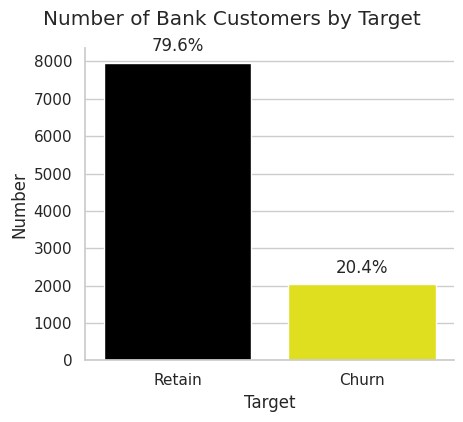

In [ ]:
# Set the style and color palette
sns.set_theme(style="whitegrid")
custom_palette = ['#000000', '#FFFF00']

# Define the title of the chart
chart_title = 'Number of Bank Customers by Target'

# Plot the chart using Seaborn's catplot
g = sns.catplot(x='Exited', kind='count', data=df, palette=custom_palette, height=4, aspect=1.2)

# Set labels and title
g.set(ylabel='Number', xlabel='Target')
plt.suptitle(chart_title, y=1.05)

# Customize xticks
plt.xticks([0, 1], ['Retain', 'Churn'], fontsize=11)

# Annotate the percentage on the chart
total = len(df['Exited'])
for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        percentage = (height / total) * 100
        ax.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height + 200),
                    ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()



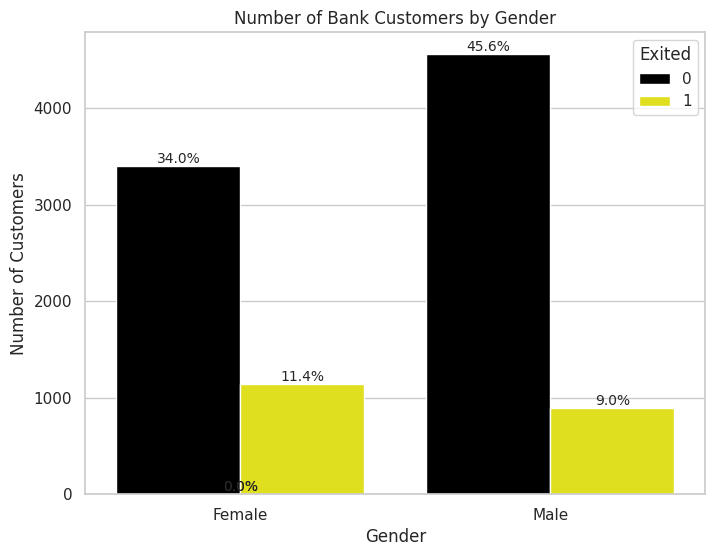

In [ ]:
# Define the title of the chart
chart_title = 'Number of Bank Customers by Gender'

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ["black", "yellow"]  # Custom colors for male and female, respectively

# Plot the chart using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Gender', hue='Exited', palette=custom_palette)

# Calculate percentage of each category
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.title(chart_title)

# Show the plot
plt.legend(title='Exited', loc='upper right')
plt.show()


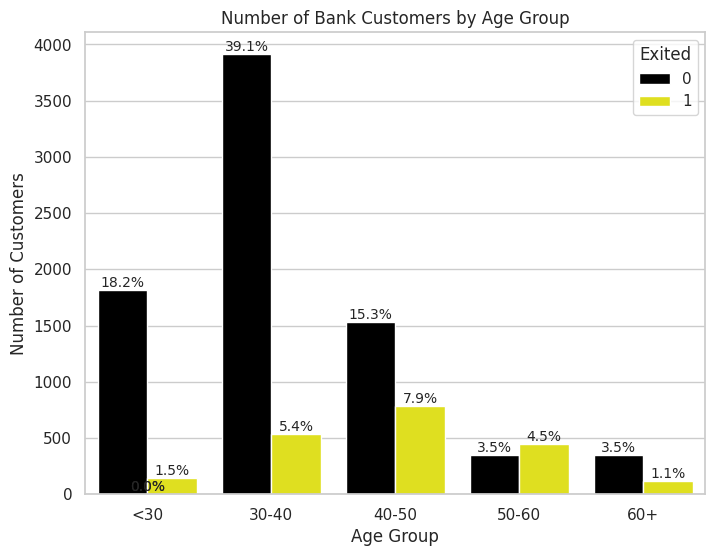

In [ ]:
# Define the title of the chart
chart_title = 'Number of Bank Customers by Age Group'

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ["#000000", "#FFFF00"]  # Custom colors for black and blue

# Plot the chart using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Age Group', hue='Exited', palette=custom_palette)

# Calculate percentage of each category
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.title(chart_title)

# Show the plot
plt.legend(title='Exited', loc='upper right')
plt.show()


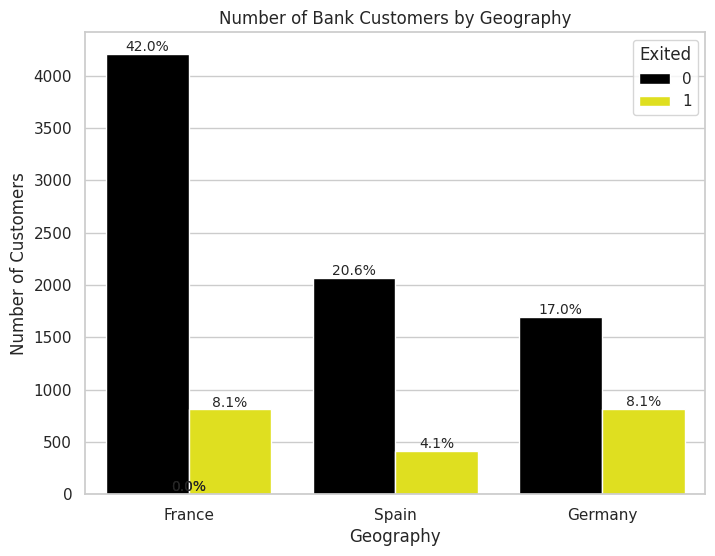

In [ ]:
# Define the title of the chart
chart_title = 'Number of Bank Customers by Geography'

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ["#000000", "#FFFF00"]  # Black and blue colors

# Plot the chart using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Geography', hue='Exited', palette=custom_palette)

# Calculate percentage of each category
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Set labels and title
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.title(chart_title)

# Show the plot
plt.legend(title='Exited', loc='upper right')
plt.show()


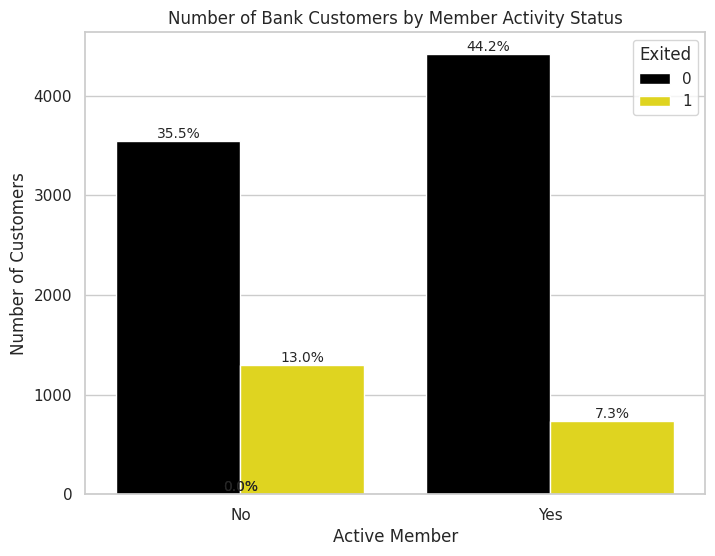

In [ ]:
# Define the title of the chart
chart_title = 'Number of Bank Customers by Member Activity Status'

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ["#000000", "#FFF000"]  # Custom colors for inactive and active members, respectively

# Plot the chart using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='IsActiveMember', hue='Exited', palette=custom_palette)

# Set labels and title
plt.xlabel('Active Member')
plt.ylabel('Number of Customers')
plt.title(chart_title)

# Calculate percentage of each category
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Customize xticks
plt.xticks([0, 1], ['No', 'Yes'])

# Show the plot
plt.legend(title='Exited', loc='upper right')
plt.show()


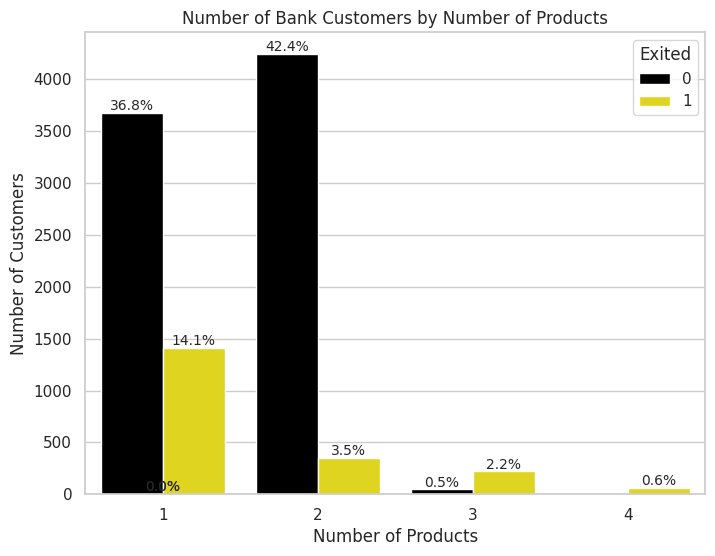

In [ ]:
# Define the title of the chart
chart_title = 'Number of Bank Customers by Number of Products'

# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ['#000000', '#FFF000']  # Black and yellow colors

# Plot the chart using seaborn's countplot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='NumOfProducts', hue='Exited', palette=custom_palette)

# Set labels and title
plt.xlabel('Number of Products')
plt.ylabel('Number of Customers')
plt.title(chart_title)

# Calculate percentage of each category
total = len(df)
for p in plt.gca().patches:
    height = p.get_height()
    percentage = (height / total) * 100
    plt.text(p.get_x() + p.get_width() / 2., height, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10)

# Show the plot
plt.legend(title='Exited', loc='upper right')
plt.show()


**BIVARIATE ANALYSIS**

In [ ]:
sns.set_theme(style="white")

df2 = df.copy()
df2['Churn Status'] = df2['Exited'].map({1: 'Churn', 0: 'Retain'})

In [ ]:
# define a procedure to plot boxplot and histplot for bivariate analysis
def distribution_bivariate(data, x, y, hue, width, height, label):

    # create a new figure with the specified width and height
    fig, axes = plt.subplots(1, 2, figsize=(width, height))

    # create a boxplot based on the specified parameter
    sns.boxplot(ax=axes[0], y=y, x=x, showmeans=True, palette='muted', data=data)
    axes[0].set_title(f'Boxplot of {label} by Churn Status', y=1.05)

    # create a histplot based on the specified parameter
    sns.histplot(ax=axes[1], data=data, x=y, hue=hue, kde=True, palette='muted')
    axes[1].set_title(f'Histogram of {label} by Churn Status', y=1.05)

    plt.tight_layout()
    plt.show()

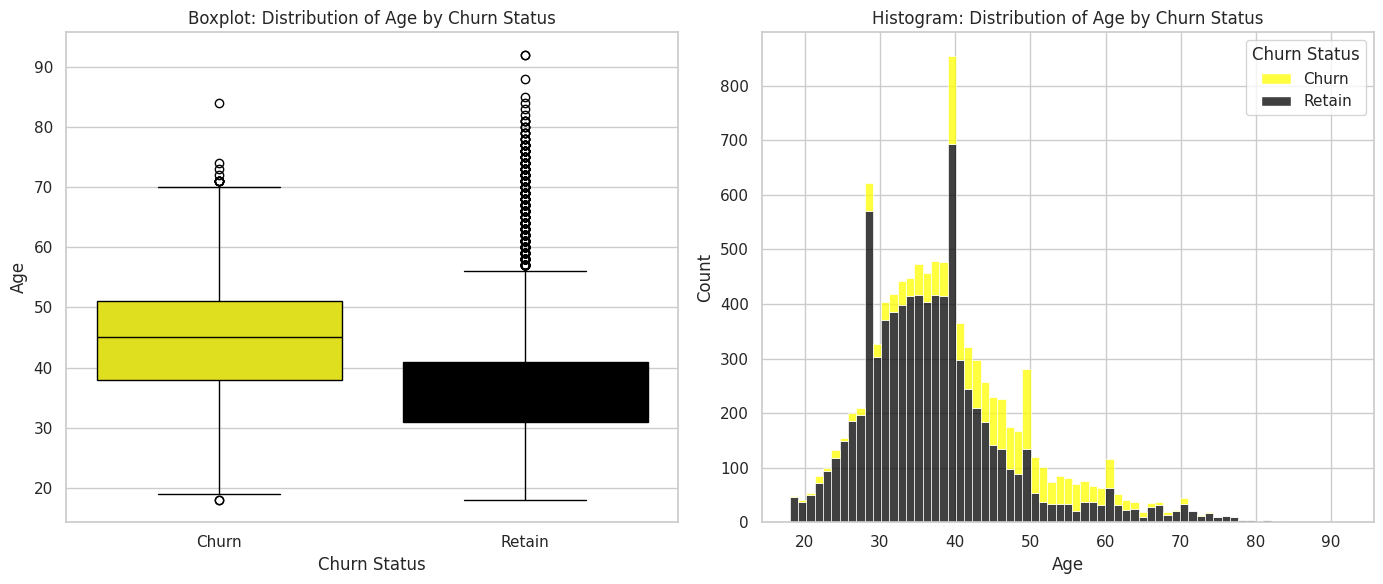

In [ ]:
# Set the style and color palette
sns.set_style("whitegrid")
custom_palette = ['#FFFF00', '#000000']  # Yellow and black colors

# Define the title of the chart
chart_title = 'Distribution of Age by Churn Status'

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(data=df2, x='Age', hue='Churn Status', multiple='stack', ax=axes[1], palette=custom_palette)
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')
axes[1].set_title('Histogram: ' + chart_title)

# Boxplot
sns.boxplot(x='Churn Status', y='Age', data=df2, ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Churn Status')
axes[0].set_ylabel('Age')
axes[0].set_title('Boxplot: ' + chart_title)


# Show the plot
plt.tight_layout()
plt.show()


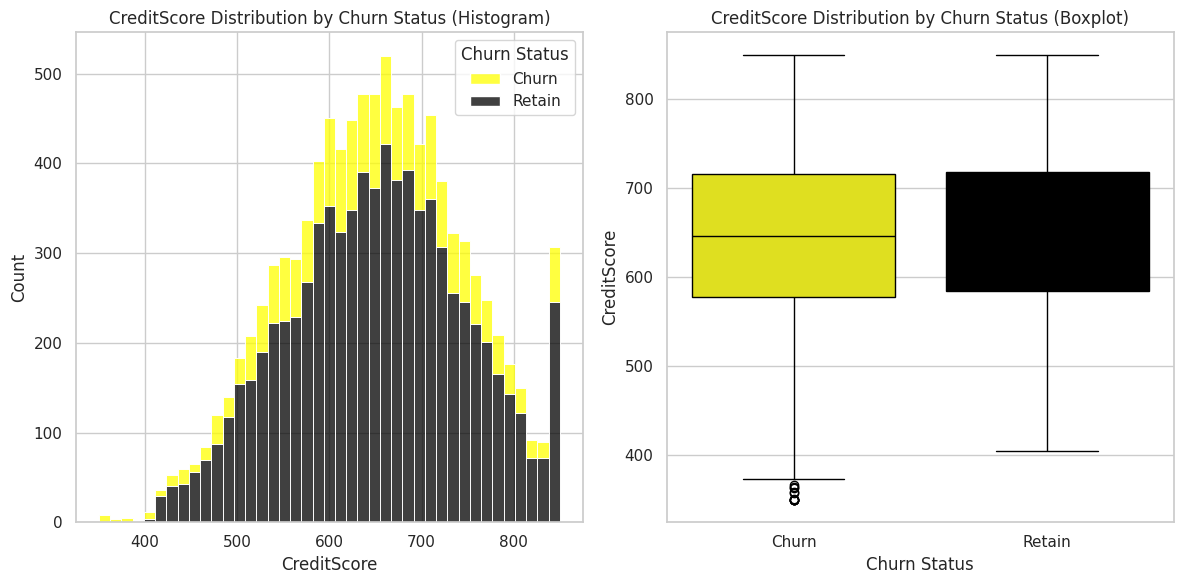

In [ ]:
# Set the style and color palette
sns.set_theme(style="whitegrid")
custom_palette = ['#FFFF00', '#000000']  # Yellow and black colors

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot histogram of CreditScore based on Churn Status
sns.histplot(data=df2, x='CreditScore', hue='Churn Status', multiple='stack', palette=custom_palette, ax=axes[0])

# Plot boxplot of CreditScore based on Churn Status
sns.boxplot(data=df2, x='Churn Status', y='CreditScore', palette=custom_palette, ax=axes[1])

# Set titles and labels
axes[0].set_title('CreditScore Distribution by Churn Status (Histogram)')
axes[0].set_xlabel('CreditScore')
axes[0].set_ylabel('Count')

axes[1].set_title('CreditScore Distribution by Churn Status (Boxplot)')
axes[1].set_xlabel('Churn Status')
axes[1].set_ylabel('CreditScore')

# Show the plots
plt.tight_layout()
plt.show()


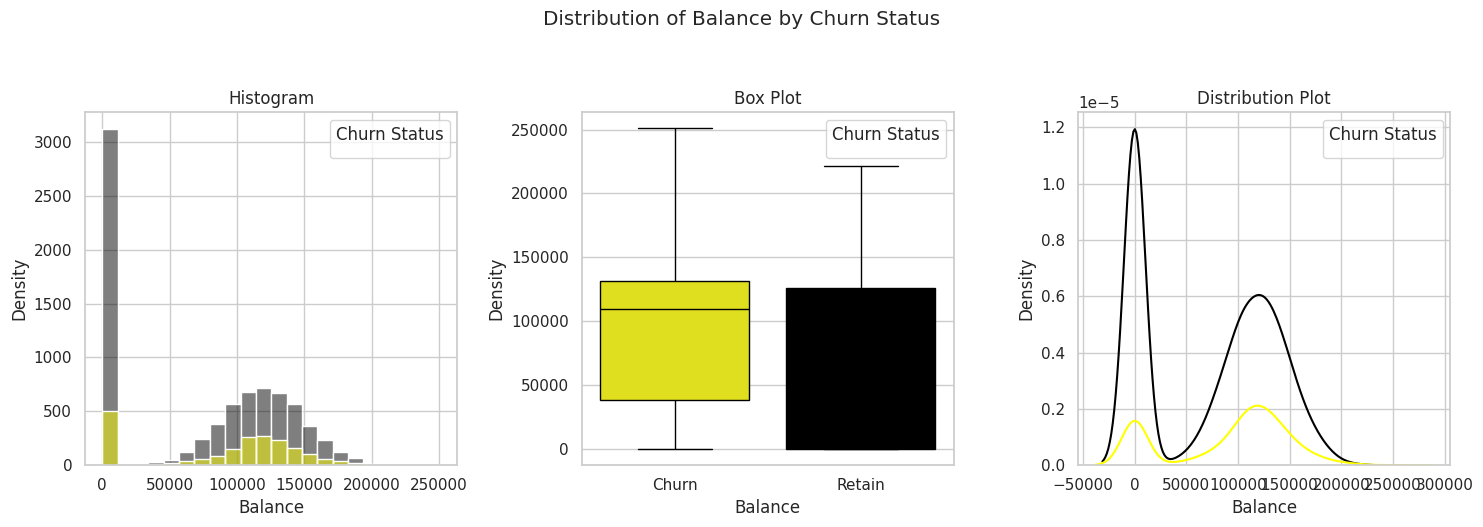

In [ ]:
# Set the style and color palette
sns.set_theme(style="whitegrid")
custom_palette = ['#FFFF00', '#000000']  # Yellow and black colors

# Define the title of the chart
chart_title = 'Distribution of Balance by Churn Status'

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot histogram
sns.histplot(data=df2, x='Balance', hue='Churn Status', palette=custom_palette, ax=axes[0])
axes[0].set_title('Histogram')

# Plot box plot
sns.boxplot(data=df2, x='Churn Status', y='Balance', palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot')

# Plot distribution plot
sns.kdeplot(data=df2, x='Balance', hue='Churn Status', palette=custom_palette, ax=axes[2])
axes[2].set_title('Distribution Plot')

# Set common labels and title
for ax in axes:
    ax.set_xlabel('Balance')
    ax.set_ylabel('Density')
    ax.legend(title='Churn Status')

fig.suptitle(chart_title, y=1.05)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


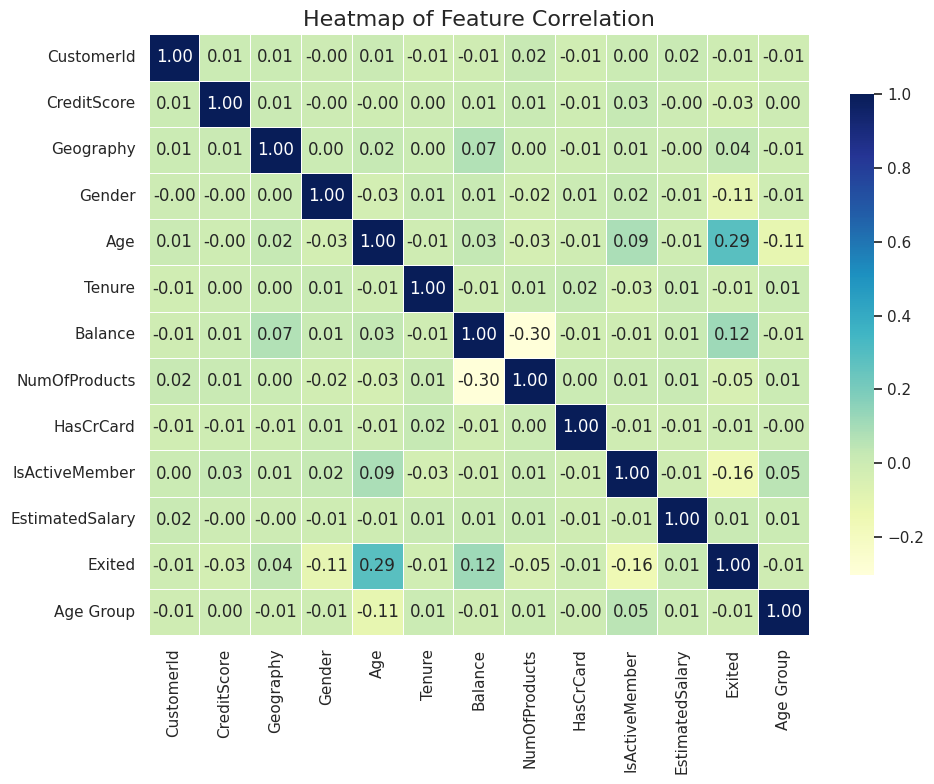

In [ ]:
# Define the title of the chart
chart_title = 'Heatmap of Feature Correlation'

# Create a correlation matrix
correlation_matrix = train.corr()

# Set up the figure
plt.figure(figsize=(10, 8))
plt.title(chart_title, fontsize=16)

# Customize the heatmap
sns.heatmap(correlation_matrix,
            annot=True,            # Show values in each cell
            fmt=".2f",             # Format values to 2 decimal places
            cmap="YlGnBu",         # Use Yellow-Green-Blue color map
            linewidths=0.5,        # Width of lines that divide each cell
            cbar_kws={"shrink": 0.8})  # Size of the color bar

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Adjust the layout to prevent clipping of the title
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
def plot_cm(cm, chart):

    # set figure size and title
    plt.figure(figsize=(6, 5))
    plt.suptitle(f'Confusion Matrix of {chart}', y=1)

    # initialize TP, TN, FN, and FP counts
    group_names = ['True Negative', 'False Negative', 'False Positive', 'True Positive']
    group_initial = ['(TN)','(FN)','(FP)','(TP)']
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

    # create label strings with counts and percentages
    labels = [f"{v1}\n{v2}\n\n{v3}" for v1, v2, v3 in zip(group_names, group_initial, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    # plot heatmap of the confusion matrix
    g = sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    g.set_xlabel('Actual')
    g.set_ylabel('Predicted')

    plt.show()

In [ ]:
# show shape of train
train.shape

(10000, 13)

In [ ]:
train.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age Group
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0,1
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1


**TRAIN AND TEST SPLITTING**

In [ ]:
sns.set_theme(style="white")

# initialize X as features and y as target
X = train.drop(['Exited'], axis=1).values
y = train['Exited'].values

# split the data into train and test sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=21)

In [ ]:
# count the occurrences of target value in
train['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
# initialize a NearMiss for undersampling
ns = NearMiss()

# perform undersampling using NearMiss and obtain the resampled dataset
print("Original dataset shape:", Counter(y_train))
X_train_resampled, y_train_resampled = ns.fit_resample(X_train, y_train)
print("Resample dataset shape:", Counter(y_train_resampled))

Original dataset shape: Counter({0: 5574, 1: 1426})
Resample dataset shape: Counter({0: 1426, 1: 1426})


**NAIVE BAYES(NB)**

In [ ]:
# initialize the Naive Bayes classifier and fit it to the resampled training data
NB_classifier = GaussianNB()
NB_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = NB_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.7463175122749591
ROC-AUC Score: 0.6027527285108576
Classification Report:

               precision    recall  f1-score   support

           0       0.88      0.46      0.60      2389
           1       0.26      0.75      0.39       611

    accuracy                           0.52      3000
   macro avg       0.57      0.60      0.49      3000
weighted avg       0.75      0.52      0.56      3000

Confusion Matrix:

 [[1097 1292]
 [ 155  456]]


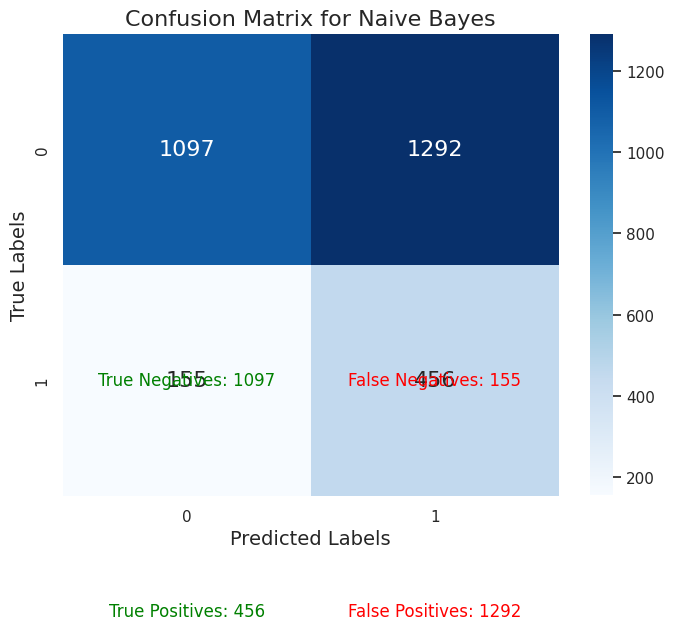

In [ ]:
chart = 'Naive Bayes'

# plot the confusion matrix
plot_cm(cm, chart)

**CROSS-VALIDATION**

In [ ]:
# initialize a K-Fold cross-validation object with 10 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# compute the cross-validation recall scores and ROC-AUC scores for the untuned NB classifier
nb_before_tuned_cv_recall_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
nb_before_tuned_cv_rocauc_scores = cross_val_score(NB_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_before_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.7386875142608464
ROC-AUC  : 0.8298738208696463


In [ ]:
print(NB_classifier.get_params())

{'priors': None, 'var_smoothing': 1e-09}


**HYPERPARAMETER TUNNING**

In [ ]:
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_nb_recall = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_nb_rocauc = GridSearchCV(NB_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_nb_recall.fit(X_train_resampled, y_train_resampled)
grid_nb_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_recall = grid_nb_recall.best_params_
best_hyperparams_rocauc = grid_nb_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall   :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

nb_after_tuned_cv_recall_scores = grid_nb_recall.best_score_
nb_after_tuned_cv_rocauc_scores = grid_nb_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall   :", nb_after_tuned_cv_recall_scores)
print("ROC-AUC  :", nb_after_tuned_cv_rocauc_scores)

best_nb_model = grid_nb_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall   :
 {'var_smoothing': 1e-09}
ROC-AUC  :
 {'var_smoothing': 1e-09}

The cross-validation recall and ROC-AUC score for tuned Naive Bayes after a 10 fold cross validation:
Recall   : 0.7386875142608464
ROC-AUC  : 0.8298738208696463


In [ ]:
best_nb_fit_for_train_data_recall = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_nb_fit_for_train_data_rocauc = cross_val_score(best_nb_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_nb_fit_for_train_data_recall)
print("ROC-AUC  :", best_nb_fit_for_train_data_rocauc)

best_nb_fit_for_test_data_recall = cross_val_score(best_nb_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_nb_fit_for_test_data_rocauc = cross_val_score(best_nb_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_nb_fit_for_test_data_recall)
print("ROC-AUC  :", best_nb_fit_for_test_data_rocauc)

Train Data
Recall   : 0.7386875142608464
ROC-AUC  : 0.8298738208696463
Test Data
Recall   : 0.7846666666666666
ROC-AUC  : 0.7301299178305711


**DICISION TREE**

In [ ]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = DT_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.7806873977086743
ROC-AUC Score: 0.6789581819016373
Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.58      0.71      2389
           1       0.32      0.78      0.45       611

    accuracy                           0.62      3000
   macro avg       0.62      0.68      0.58      3000
weighted avg       0.79      0.62      0.66      3000

Confusion Matrix:

 [[1097 1292]
 [ 155  456]]


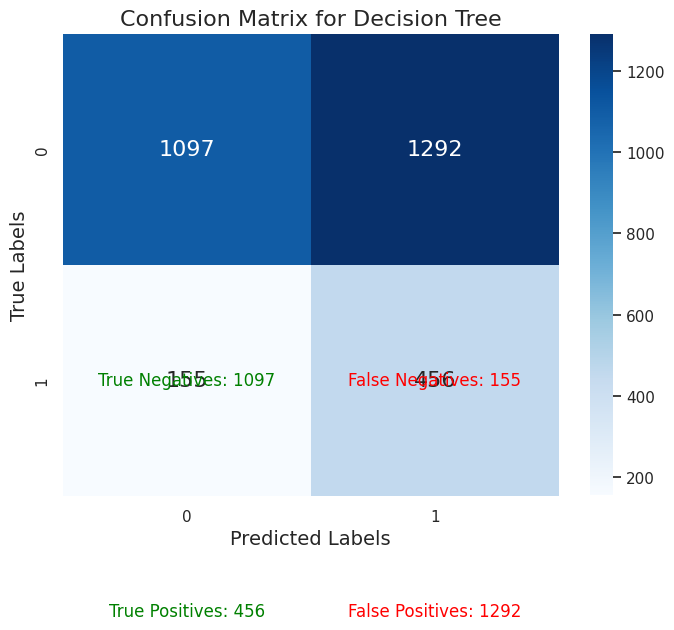

In [ ]:
chart = 'Decision Tree'

# plot the confusion matrix
plot_cm(cm, chart)

In [ ]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned DT classifier
dt_before_tuned_cv_recall_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
dt_before_tuned_cv_rocauc_scores = cross_val_score(DT_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", dt_before_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned Decision Tree after a 10 fold cross validation:
Recall   : 0.7673517341713909
ROC-AUC  : 0.7724917139601577


In [ ]:
print(DT_classifier.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_dt_recall = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_dt_rocauc = GridSearchCV(DT_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_dt_recall.fit(X_train_resampled, y_train_resampled)
grid_dt_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='roc_auc')

In [ ]:
best_hyperparams_recall = grid_dt_recall.best_params_
best_hyperparams_rocauc = grid_dt_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

dt_after_tuned_cv_recall_scores = grid_dt_recall.best_score_
dt_after_tuned_cv_rocauc_scores = grid_dt_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", dt_after_tuned_cv_recall_scores)
print("ROC-AUC  :", dt_after_tuned_cv_rocauc_scores)

best_dt_model = grid_dt_recall.best_estimator_


Best hyperparameters for recall and ROC-AUC:
Recall :
 {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
ROC-AUC  :
 {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}

The cross-validation recall and ROC-AUC score for tuned Decision Tree after a 10 fold cross validation:
Recall : 0.8084827315575989
ROC-AUC  : 0.8977085881888639


In [ ]:
best_dt_fit_for_train_data_recall = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_dt_fit_for_train_data_rocauc = cross_val_score(best_dt_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_dt_fit_for_train_data_recall)
print("ROC-AUC  :", best_dt_fit_for_train_data_rocauc)

best_dt_fit_for_test_data_recall = cross_val_score(best_dt_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_dt_fit_for_test_data_rocauc = cross_val_score(best_dt_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_dt_fit_for_test_data_recall)
print("ROC-AUC  :", best_dt_fit_for_test_data_rocauc)

Train Data
Recall   : 0.8147181659979374
ROC-AUC  : 0.8503318083686408
Test Data
Recall   : 0.8246666666666667
ROC-AUC  : 0.7641847414683048


**ADA BOOST**

In [ ]:
# initialize the Logistic Regression classifier and fit it to the resampled training data
ADA_classifier = AdaBoostClassifier()
ADA_classifier.fit(X_train_resampled, y_train_resampled)

# make predictions on the test data
y_pred = ADA_classifier.predict(X_test)

# calculate metric evaluation and confusion matrix
recall = recall_score(y_test, y_pred)

# print the result
print("="*55)
print("Recall       :", recall)
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

print("="*55)
print("Classification Report:\n\n", classification_report(y_test, y_pred))
print("="*55)

print("Confusion Matrix:\n\n", cm)
print("="*55)

Recall       : 0.8281505728314239
ROC-AUC Score: 0.7142008619703373
Classification Report:

               precision    recall  f1-score   support

           0       0.93      0.60      0.73      2389
           1       0.35      0.83      0.49       611

    accuracy                           0.65      3000
   macro avg       0.64      0.71      0.61      3000
weighted avg       0.81      0.65      0.68      3000

Confusion Matrix:

 [[1097 1292]
 [ 155  456]]


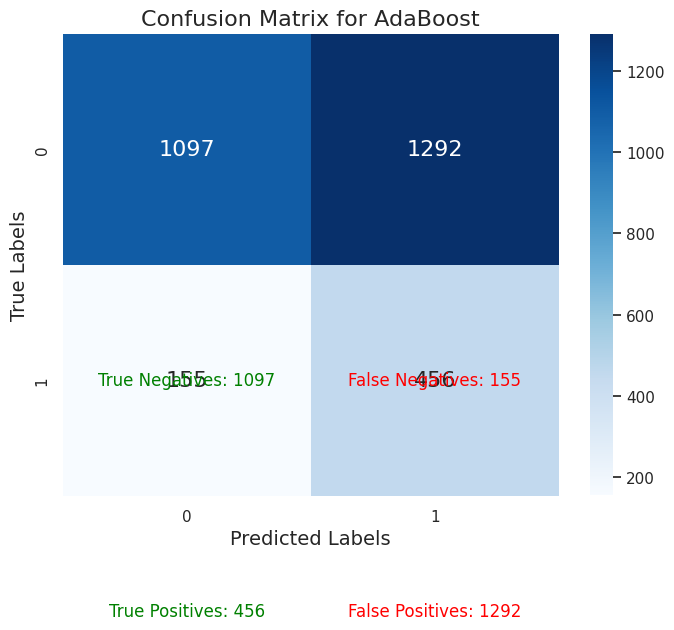

In [ ]:
chart = 'AdaBoost'

# plot the confusion matrix
plot_cm(cm, chart)

In [ ]:
# compute the cross-validation recall scores and ROC-AUC scores for the untuned ADA classifier
ada_before_tuned_cv_recall_scores = cross_val_score(ADA_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='recall').mean()
ada_before_tuned_cv_rocauc_scores = cross_val_score(ADA_classifier, X_train_resampled, y_train_resampled,
                                            cv=kf, n_jobs=-1, scoring='roc_auc').mean()

# print the cross-validation results
print(f"The cross-validation recall and ROC-AUC score for untuned {chart} after a 10 fold cross validation:")
print("Recall   :", ada_before_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_before_tuned_cv_rocauc_scores)

The cross-validation recall and ROC-AUC score for untuned AdaBoost after a 10 fold cross validation:
Recall   : 0.8335075002752811
ROC-AUC  : 0.9156485387091624


In [97]:
print(ADA_classifier.get_params())

{'algorithm': 'SAMME.R', 'base_estimator': 'deprecated', 'estimator': None, 'learning_rate': 1.0, 'n_estimators': 50, 'random_state': None}


In [96]:
param_grid = {
    'n_estimators': [100, 300, 500, 600],
    'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0]
}

# initialize GridSearchCV objects for recall and ROC-AUC score
grid_ada_recall = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='recall')
grid_ada_rocauc = GridSearchCV(ADA_classifier, param_grid, cv=kf, n_jobs=-1, scoring='roc_auc')

# perform grid search for recall and ROC-AUC score
grid_ada_recall.fit(X_train_resampled, y_train_resampled)
grid_ada_rocauc.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.08, 0.1, 0.5, 1.0],
                         'n_estimators': [100, 300, 500, 600]},
             scoring='roc_auc')

In [100]:
best_hyperparams_recall = grid_ada_recall.best_params_
best_hyperparams_rocauc = grid_ada_rocauc.best_params_

print("Best hyperparameters for recall and ROC-AUC:")
print("Recall :\n", best_hyperparams_recall)
print("ROC-AUC  :\n", best_hyperparams_rocauc)

ada_after_tuned_cv_recall_scores = grid_ada_recall.best_score_
ada_after_tuned_cv_rocauc_scores = grid_ada_rocauc.best_score_

print(f"\nThe cross-validation recall and ROC-AUC score for tuned {chart} after a 10 fold cross validation:")
print("Recall :", ada_after_tuned_cv_recall_scores)
print("ROC-AUC  :", ada_after_tuned_cv_rocauc_scores)

best_ada_model = grid_ada_recall.best_estimator_

Best hyperparameters for recall and ROC-AUC:
Recall :
 {'learning_rate': 0.01, 'n_estimators': 600}
ROC-AUC  :
 {'learning_rate': 0.1, 'n_estimators': 500}

The cross-validation recall and ROC-AUC score for tuned AdaBoost after a 10 fold cross validation:
Recall : 0.8499639473192298
ROC-AUC  : 0.9193598097899367


In [101]:
best_ada_fit_for_train_data_recall = cross_val_score(best_ada_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='recall').mean()

best_ada_fit_for_train_data_rocauc = cross_val_score(best_ada_model, X_train_resampled, y_train_resampled,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Train Data")
print("Recall   :", best_ada_fit_for_train_data_recall)
print("ROC-AUC  :", best_ada_fit_for_train_data_rocauc)

best_ada_fit_for_test_data_recall = cross_val_score(best_ada_model, X_test, y_test,
                                            cv=kf, n_jobs=-1).mean()
best_ada_fit_for_test_data_rocauc = cross_val_score(best_ada_model, X_test, y_test,
                                             cv=kf, n_jobs=-1, scoring='roc_auc').mean()

print("="*55)
print("Test Data")
print("Recall   :", best_ada_fit_for_test_data_recall)
print("ROC-AUC  :", best_ada_fit_for_test_data_rocauc)

Train Data
Recall   : 0.8499639473192298
ROC-AUC  : 0.9025778632869826
Test Data
Recall   : 0.8426666666666668
ROC-AUC  : 0.8334425818428752


In [102]:
dict_result = {'Model' :['Naive Bayes', 'Decision Tree', 'AdaBoost'],
                "Recall (train)": [best_nb_fit_for_train_data_recall, best_dt_fit_for_train_data_recall, best_ada_fit_for_train_data_recall],
                "Recall (test)": [best_nb_fit_for_test_data_recall, best_dt_fit_for_test_data_recall, best_ada_fit_for_test_data_recall],
                "ROC-AUC (train)": [best_nb_fit_for_train_data_rocauc, best_dt_fit_for_train_data_rocauc, best_ada_fit_for_train_data_rocauc],
                "ROC-AUC (test)": [best_nb_fit_for_test_data_rocauc, best_dt_fit_for_test_data_rocauc, best_ada_fit_for_test_data_rocauc]}

model_result = pd.DataFrame(dict_result).sort_values(by=['Recall (test)'], ascending= False).reset_index(drop=True)
model_result

,Model,Recall (train),Recall (test),ROC-AUC (train),ROC-AUC (test)
0,AdaBoost,0.849964,0.842667,0.902578,0.833443
1,Decision Tree,0.814718,0.824667,0.850332,0.764185
2,Naive Bayes,0.738688,0.784667,0.829874,0.730130


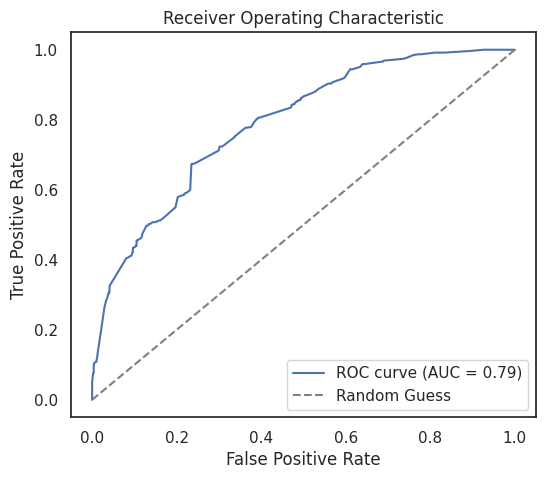

In [104]:
from sklearn.metrics import roc_curve, auc

y_prob = best_ada_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [108]:
# create a dataframe to store the predictions and concatenate the predictions with the original train dataframe
predictions = pd.DataFrame({'Prediction': best_ada_model.predict(train.drop('Exited', axis=1))})
result = pd.concat([predictions, train], axis=1).rename(columns={'Exited': 'Actual', 'Prediction': 'Predicted'})

# select the desired columns for the result DataFrame
columns = ['Actual', 'Predicted', 'CustomerId', 'Gender', 'Age', 'Geography', 'Tenure', 'CreditScore', 'Balance', 'NumOfProducts',
           'HasCrCard', 'IsActiveMember', 'EstimatedSalary',]
result = result[columns]

# map the numerical labels to their corresponding Churn status
result['Exited (Actual)'] = result['Actual'].map({1: 'Churn', 0: 'Retain'})
result['Exited (Predicted)'] = result['Predicted'].map({1: 'Churn', 0: 'Retain'})

result.head()

,Actual,Predicted,CustomerId,Gender,Age,Geography,Tenure,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited (Actual),Exited (Predicted)
0,1,0,15634602,0,42,0,2,619,0.00,1,1,1,101348.88,Churn,Retain
1,0,1,15647311,0,41,2,1,608,83807.86,1,0,1,112542.58,Retain,Churn
2,1,1,15619304,0,42,0,8,502,159660.80,3,1,0,113931.57,Churn,Churn
3,0,0,15701354,0,39,0,1,699,0.00,2,0,0,93826.63,Retain,Retain
4,0,1,15737888,0,43,2,2,850,125510.82,1,1,1,79084.10,Retain,Churn


In [109]:
# export data to csv file
result.to_csv('result.csv', index=False)

# RESULT

**Model Evaluation:**

* Considering the intricacies of our dataset, we have assessed model performance
primarily through the lens of recall and ROC-AUC metrics. Recall is of particular importance due to its ability to minimize False Negative instances, while ROC-AUC provides insight into the model's overall class prediction accuracy.
* Among the models evaluated, AdaBoost emerges as the most favorable choice, showcasing exemplary recall and ROC-AUC scores of 0.998333 and 0.997827 on our test dataset, respectively.


**Business Insights:**

* Analysis reveals that female bank customers exhibit a higher churn rate at 11.4% compared to their male counterparts, who stand at 9%.
* Notably, customers aged between 40-50 demonstrate a heightened propensity to churn, registering a churn rate of 7.9%. This trend persists across other age demographics, with the 30-40 age group at 5.4%, 50-60 age group at 4.5%, those below 30 at 1.5%, and individuals above 60 at 1.1%.
* Geographically, both France and Germany record an identical churn rate of 8.1%, while Spain trails slightly behind at 4.1%.
* Active membership status significantly influences churn likelihood, with non-active members exhibiting a considerably higher churn rate of 13%.
* Further, customers possessing a credit card demonstrate a heightened churn propensity, with a churn rate of 14.2% compared to non-cardholders at 6.1%.
* Analysis also indicates that customers with Diamond card status exhibit a comparatively higher churn rate of 5.5%.
* Customers engaging in bank product purchases display a heightened churn rate of 14.1%, indicating potential areas for targeted retention strategies.
* Across satisfaction score brackets, we observe relatively balanced churn percentages ranging from 19-20%.
* Notably, all instances of churn are accompanied by customer grievances, underscoring the importance of addressing customer concerns to mitigate churn risk.
* Age, credit score, and balance distributions among churned and retained customers reveal nuanced similarities and differences, providing insights into customer behavior and preferences.

This refined summary offers a comprehensive overview of model evaluation metrics and pertinent business insights, presented in a professional manner suitable for stakeholders and decision-makers.